### Ridge Lasso PCR and Boosting Tree Regression on Crime Data

### Sitao min

### Regression ON Crime Data

### (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import os
from subprocess import check_output
import missingno as msno
import seaborn as sns

In [2]:
column_name = []
fileRead = open('column_name.txt', "r", encoding='utf-8')
lines = fileRead.readlines() 
fileRead.close()

for line in lines:  
    line = line.strip()
    column_name.append(line)
print(len(column_name))

128


In [3]:
data = pd.read_csv('communities.csv',header = None)
data.columns = column_name

In [4]:
print('data shape:',data.shape)

data shape: (1994, 128)


In [5]:
data.head()

state county community        communityname  fold  population  \
0      8      ?         ?         Lakewoodcity     1        0.19   
1     53      ?         ?          Tukwilacity     1        0.00   
2     24      ?         ?         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45          ?   
2         ...               0.01     0.21            0.02          ?   
3         ...               0.02     0.39            0.28          ?   
4         ...               0.04     0.09            0.02          ?   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1              ?                    ?                    ?   
2              ?                    ?                    ?   
3              ?                    ?                    ?   
4              ?                    ?                    ?   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00                ?                 0.67  
2                 0.00                ?                 0.43  
3                 0.00                ?                 0.12  
4                 0.00                ?                 0.03  

[5 rows x 128 columns]

### (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set.

### i. visualize missing data

In [6]:
data[data == '?'] = np.nan

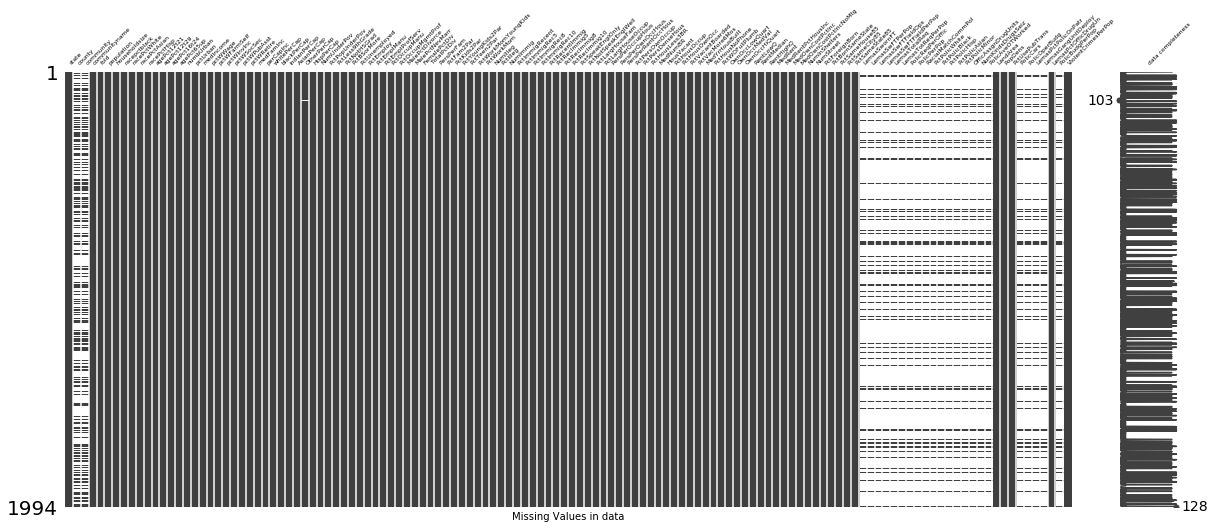

In [24]:
file = 'data'
msno.matrix(df=eval(file), figsize=(20,8),labels= True, fontsize= 6)
plt.xlabel('Missing Values in ' + file)
plt.show()

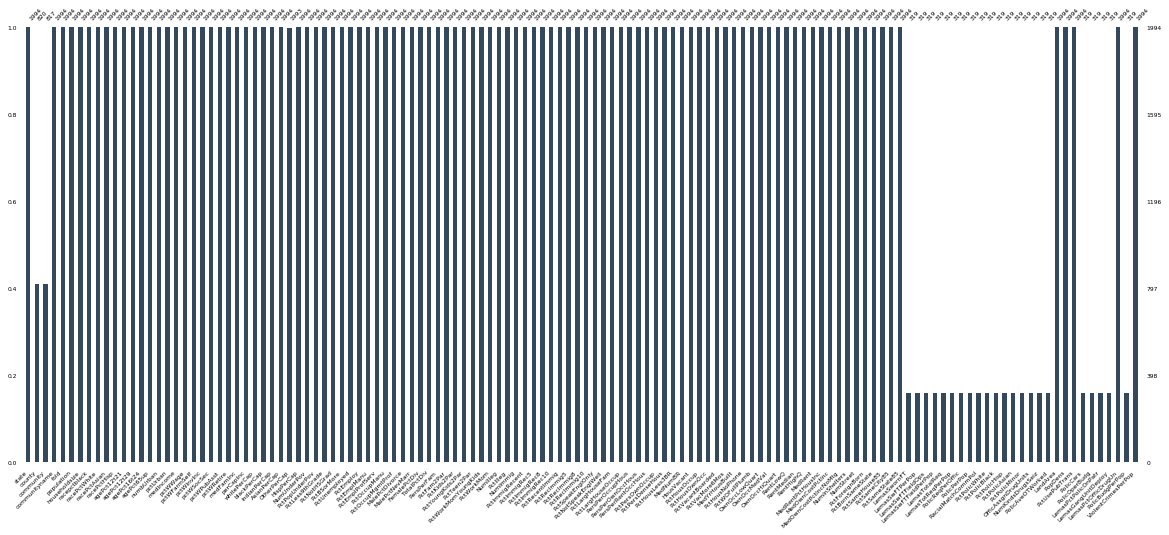

In [25]:
missingValueColumns = data.columns.tolist()
msno.bar(data[missingValueColumns],figsize=(20,8),color="#34495e",fontsize=6,labels=True)

### ii imputing the missing value

In [7]:
colHasMissingValue = list()
for i in data.columns.values:
    if data[i][data[i].isna()].shape[0] !=0:
        colHasMissingValue.append(i)

In [8]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
data[colHasMissingValue] = imp.fit_transform(data[colHasMissingValue])

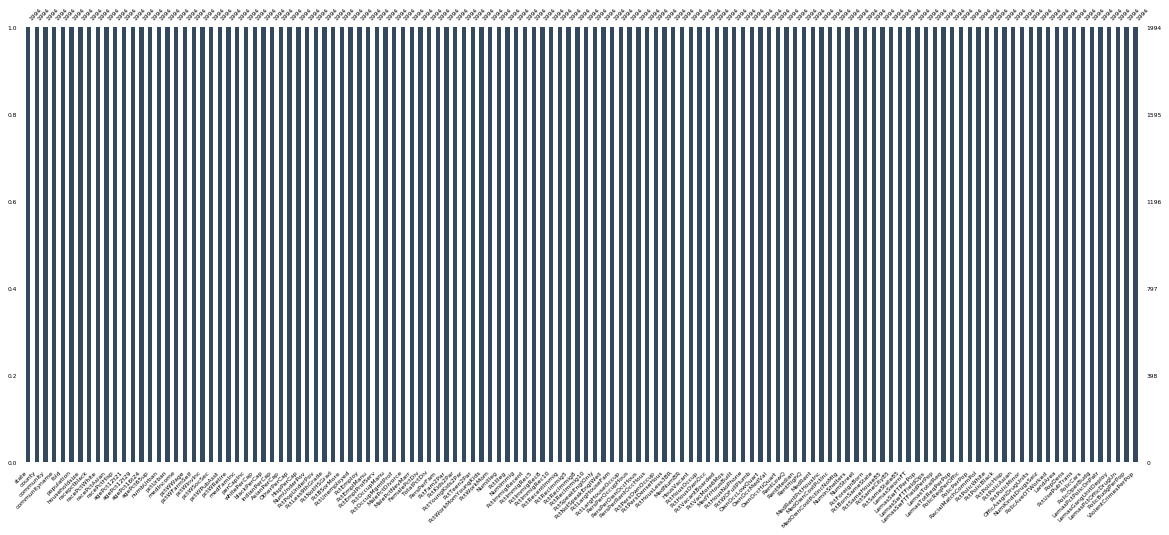

In [28]:
missingValueColumns = data.columns.tolist()
msno.bar(data[missingValueColumns],figsize=(20,8),color="#34495e",fontsize=6,labels=True)

### (c) Plot a correlation matrix for the features in the data set.

In [10]:
corr = data.corr()
corr.style.background_gradient()

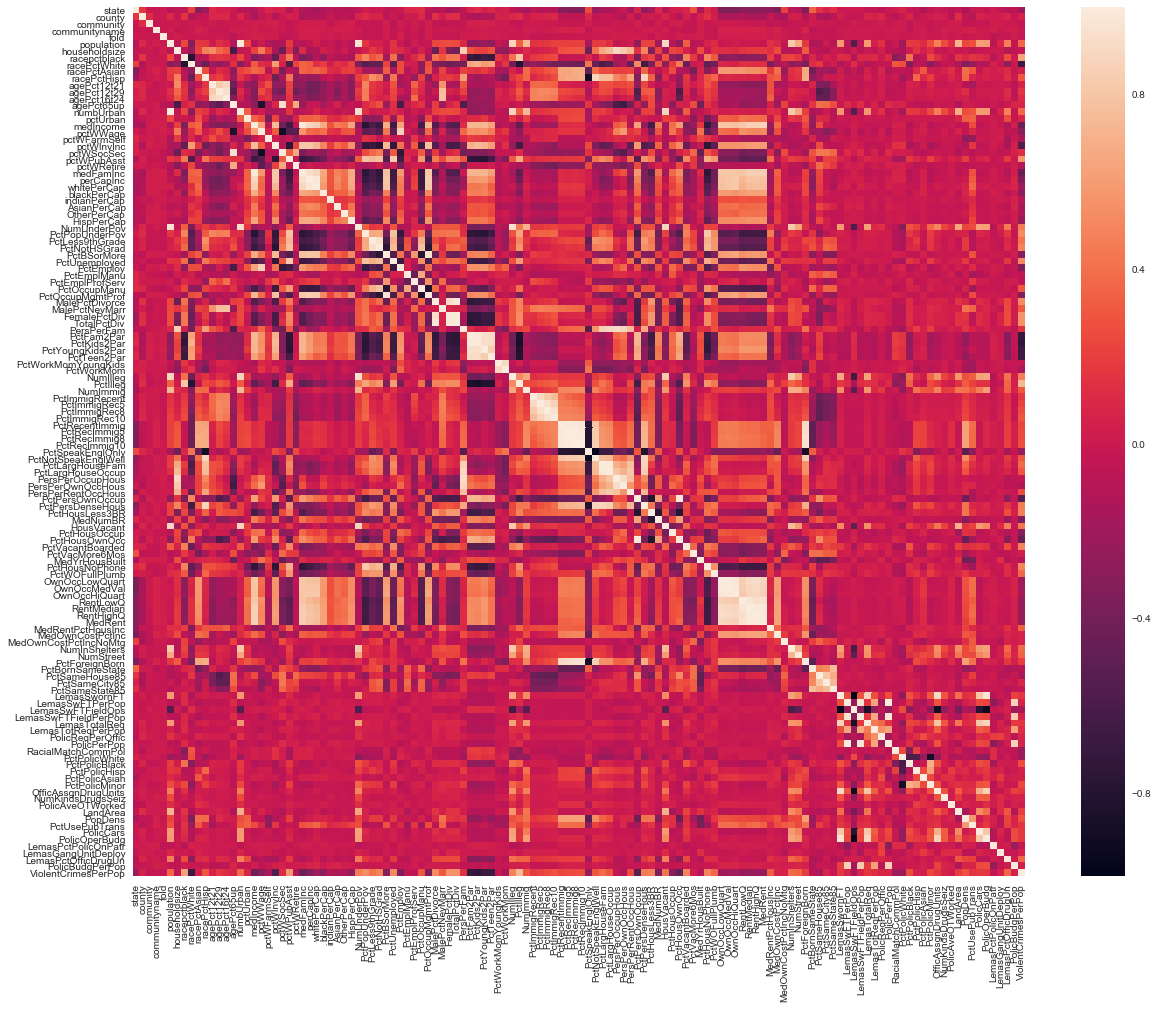

In [288]:
import seaborn as sns
cols = data.columns
cor_matrix = data.corr()
#mask = np.zeros_like(cor_matrix, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (20,16))
hm = sns.heatmap(cor_matrix, cbar = True,
                 yticklabels = cols,
                 xticklabels = cols)
plt.show()

### (d).Calculate the Coefficient of Variation CV for each feature, where CV = s/m

In [11]:
class_mapping = {label:idx for idx,label in enumerate(set(data['communityname']))}
data['communityname'] = data['communityname'].map(class_mapping)

In [12]:
cv_list = dict()
for feature in data.columns.values:
    s = data[feature].std()
    m = data[feature].mean()
    cv = s/m
    cv_list[feature] = cv
    print('%21s cv: %f'%(feature, cv))

                state cv: 0.571671
               county cv: 1.377624
            community cv: 0.350489
        communityname cv: 0.578540
                 fold cv: 0.523062
           population cv: 2.203503
        householdsize cv: 0.353298
         racepctblack cv: 1.410920
         racePctWhite cv: 0.323782
         racePctAsian cv: 1.359162
          racePctHisp cv: 1.614278
          agePct12t21 cv: 0.365840
          agePct12t29 cv: 0.290693
          agePct16t24 cv: 0.495161
           agePct65up cv: 0.423442
            numbUrban cv: 2.001744
             pctUrban cv: 0.638849
            medIncome cv: 0.579753
             pctWWage cv: 0.327710
         pctWFarmSelf cv: 0.700030
           pctWInvInc cv: 0.359240
           pctWSocSec cv: 0.368513
          pctWPubAsst cv: 0.699031
           pctWRetire cv: 0.349639
            medFamInc cv: 0.527732
            perCapInc cv: 0.545633
          whitePerCap cv: 0.507552
          blackPerCap cv: 0.589469
         indianPerCa

### (e). pick $\sqrt{128}$ features with highest CV , and make scatter plots and box plots

In [13]:
import math

In [14]:
from operator import itemgetter
 
#sort by value
cv_list = sorted(cv_list.items(), key=itemgetter(1), reverse=True)

In [15]:
features = []
for index in range(0,int(math.sqrt(128))):
    feature = cv_list[index][0]
    features.append(feature)

In [16]:
print('highest features:',features)

highest features: ['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


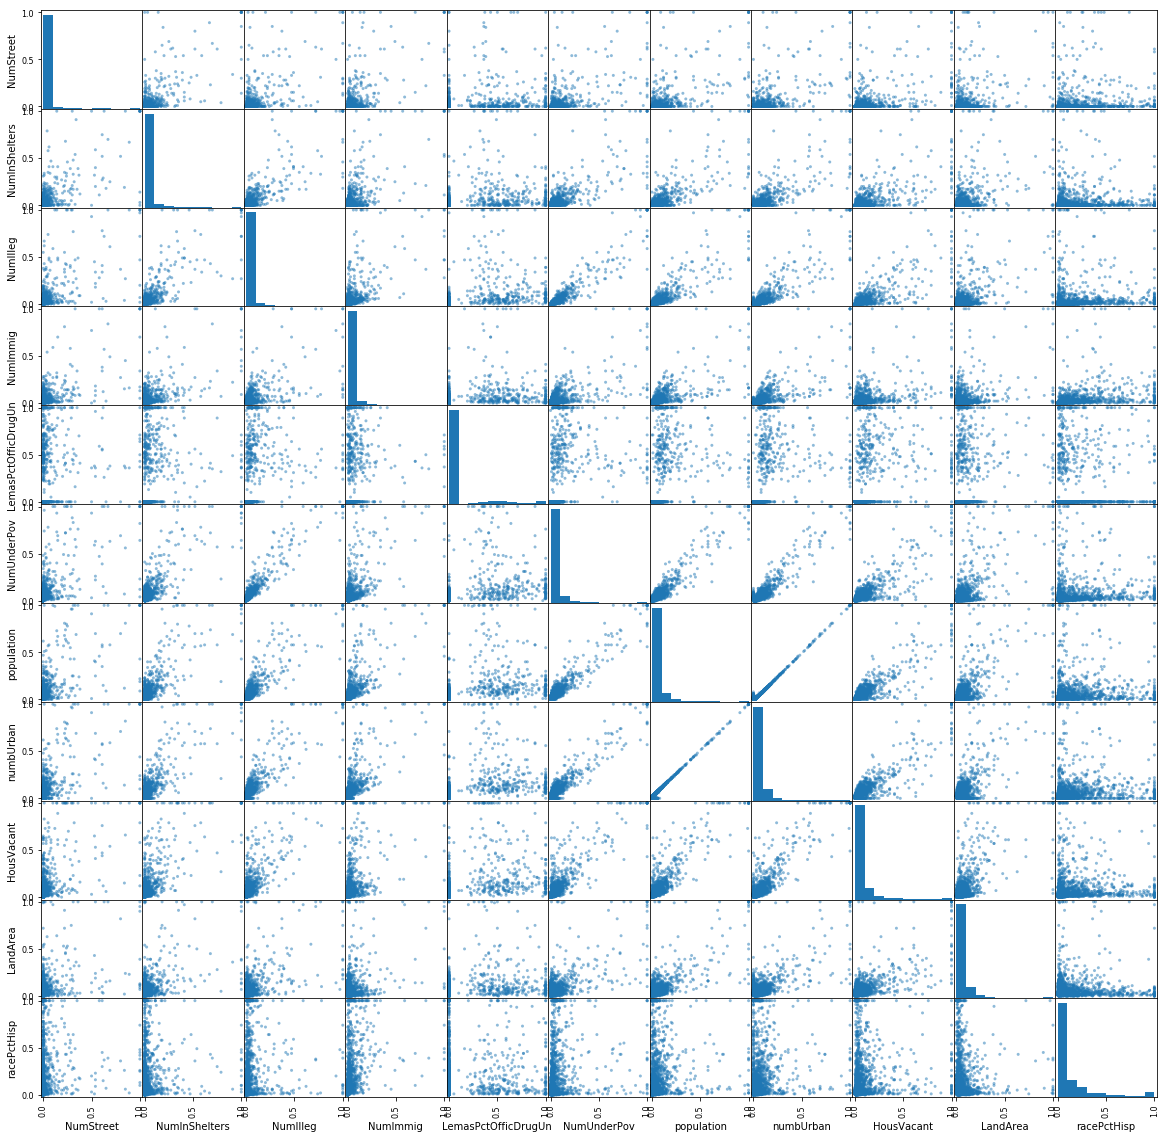

In [18]:
scatter_plot_data = pd.DataFrame(data, columns=features)
scatter_plot_data.index = data.index
pd.scatter_matrix(scatter_plot_data, figsize=(20,20))
plt.show()

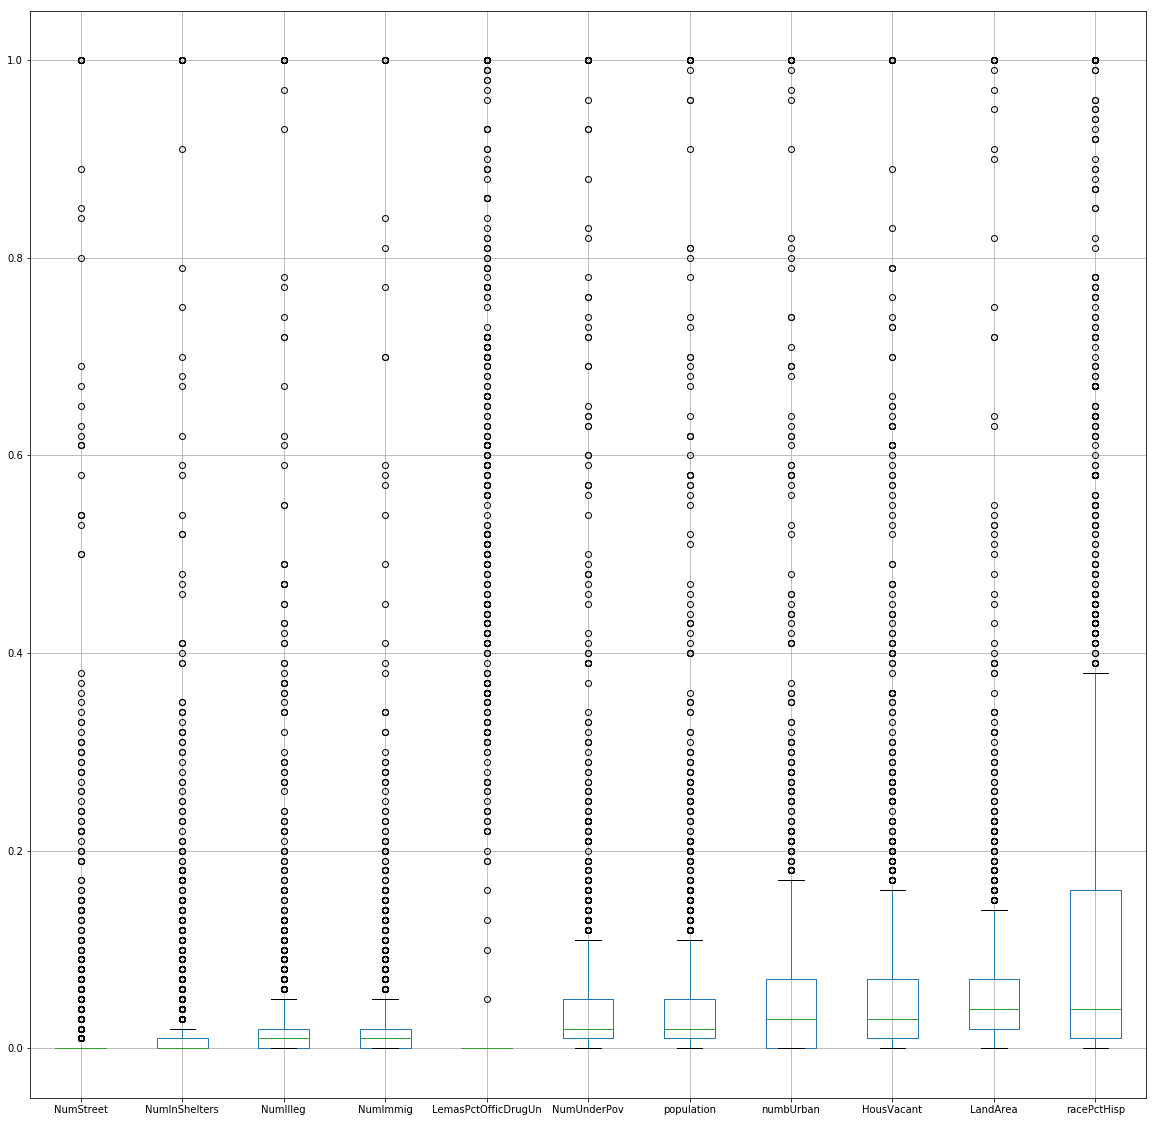

In [19]:
scatter_plot_data.boxplot(figsize=(20,20))

### (f).Fit a linear model using least squares

##### Making training and testing data

In [22]:
training_data = data.iloc[0:1495,:]
testing_data = data.iloc[1495:,:]

##### Train and test data

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X_train = training_data.iloc[:,0:-1].values
y_train = training_data.iloc[:,-1].values
X_test = testing_data.iloc[:,0:-1].values
y_test = testing_data.iloc[:,-1].values

regr = LinearRegression()

#Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The mean squared error
print("Test Mean squared error: %.2f"
      % metrics.mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test,y_pred))

Test Mean squared error: 0.96
Variance score: -19.16


### (g) Fit a ridge regression model on the training set

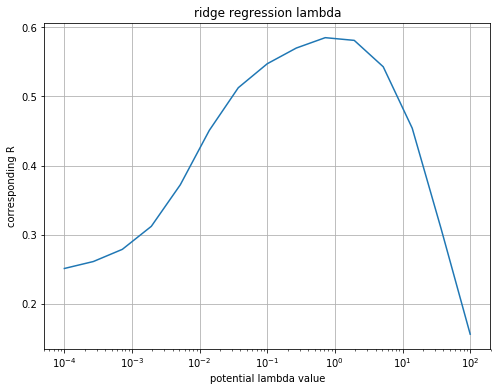

In [25]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
alpha = np.logspace(-4, 2, num=15)
ridge_regression_R = []
for item in alpha:
    ridge_regression_model = Ridge(alpha=item, normalize=True)
    ridge_regression_model.fit(X_train, y_train)
    ridge_regression_R.append(np.mean(cross_val_score(ridge_regression_model, X_test, y_test, cv=10)))
plt.figure(num=1, figsize=(8,6))
plt.plot(alpha, ridge_regression_R)
plt.xscale('log')
plt.xlabel('potential lambda value')
plt.ylabel('corresponding R')
plt.title('ridge regression lambda')
plt.grid(True)

In [29]:
from sklearn import metrics
ridge_regression_model = Ridge(alpha=1, normalize=True)
ridge_regression_model.fit(X_train, y_train)
ridge_regression_predict_y = ridge_regression_model.predict(X_test)
ridge_regression_R = ridge_regression_model.score(X_test,y_test)
ridge_regression_test_error = metrics.mean_squared_error(y_test, ridge_regression_predict_y)
print('MSE:',ridge_regression_test_error)
print('R^2:',ridge_regression_R)

MSE: 0.017136405931326724
R^2: 0.6396530834224337


### (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with normalized features. Report the test error for both cases and compare them.

/Users/apple/venv/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


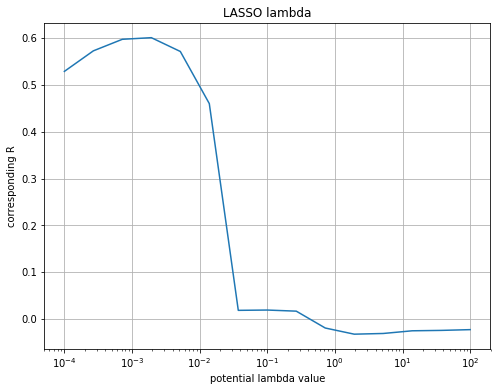

In [31]:
from sklearn.linear_model import Lasso 
lasso_R = []
for item in alpha:
    lasso_model = Lasso(alpha=item, normalize=False)
    lasso_model.fit(X_train, y_train)
    lasso_R.append(np.mean(cross_val_score(lasso_model, X_test, y_test, cv=10)))

plt.figure(num=2, figsize=(8,6))
plt.plot(alpha, lasso_R)
plt.xscale('log')
plt.xlabel('potential lambda value')
plt.ylabel('corresponding R')
plt.title('LASSO lambda')
plt.grid(True)

best alphas: 0.23236249146689986
Test Mean squared error: 0.05
Variance score: 0.05


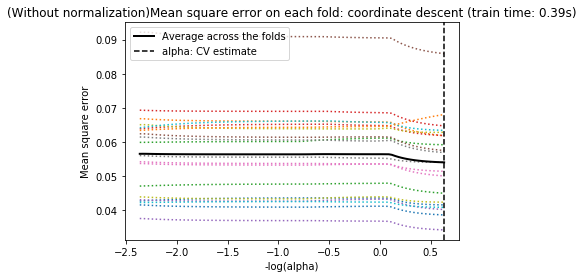

In [35]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import time

# LassoCV: coordinate descent

# Compute paths
t1 = time.time()
model = LassoCV(cv=20).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

# print results
print('best alphas:',model.alpha_)

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('(Without normalization)Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')


y_pred = model.predict(X_test)
# The mean squared error
print("Test Mean squared error: %.2f"% metrics.mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test,y_pred))

best alphas: 1.6008193009499205e-05
Test Mean squared error: 0.02
Variance score: 0.63


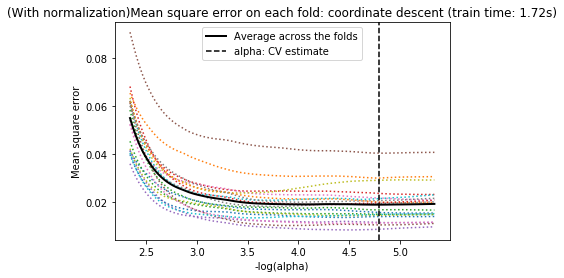

In [36]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
import time

# LassoCV: coordinate descent

# Compute paths
t1 = time.time()
model = LassoCV(cv=20,normalize = True).fit(X_train, y_train)
t_lasso_cv = time.time() - t1

print('best alphas:',model.alpha_)

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()

plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('(With normalization)Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')


y_pred = model.predict(X_test)
# The mean squared error
print("Test Mean squared error: %.2f"% metrics.mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % metrics.r2_score(y_test,y_pred))

#### Compare result with normalized and not normalized model, we can see that nomarlization is very important in lasso regression.

### (i) Fit a PCR model on the training set 

In [32]:
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

In [33]:
training_data = data.iloc[0:1495,:]
testing_data = data.iloc[1495:,:]

In [37]:
potential_components = np.linspace(112,121,10,dtype=int)
pca_model_R = []
for num in potential_components:
    pca_model = PCA(n_components=num)
    new_train_set_x = pca_model.fit_transform(X_train)
    new_test_set_x = pca_model.transform(X_test)
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(new_train_set_x, y_train)
    pca_model_R.append(np.mean(cross_val_score(linear_regression_model, new_test_set_x, y_test, cv=10)))

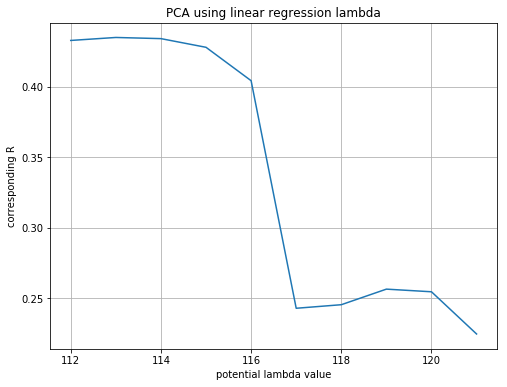

In [38]:
plt.figure(num=4, figsize=(8,6))
plt.plot(potential_components, pca_model_R)
plt.xlabel('potential lambda value')
plt.ylabel('corresponding R')
plt.title('PCA using linear regression lambda')
plt.grid(True)

In [34]:
pca = PCA()
X = training_data.iloc[:,:-1]
X_reduced = pca.fit_transform(scale(X))

In [35]:
pd.DataFrame(pca.components_.T).iloc[:4,:5]

0         1         2         3         4
0  0.005214 -0.086619  0.008070  0.021260  0.094081
1  0.030560 -0.016782  0.016891 -0.036871  0.041878
2 -0.010692 -0.008519 -0.001657 -0.003973  0.007121
3  0.002329 -0.005754 -0.020703  0.004968 -0.008966

(-1, 131.25)

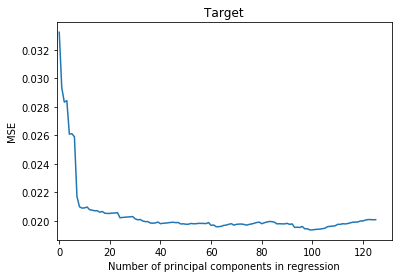

In [44]:
y = training_data.iloc[:,-1]
# 10-fold CV, with shuffle
n = len(X_reduced)
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

lr = LinearRegression()
mse = []
# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 127):
    score = -1*model_selection.cross_val_score(lr, X_reduced[:,:i], y.ravel(), cv=cv_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse)
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Target')
plt.xlim(xmin=-1)

In [45]:
for i, element in enumerate(mse):
    if element == min(mse):
        M = i
print('M chosen from cv:', M)

M chosen from cv: 99


In [277]:
X_reduced_test = pca.transform(scale(X_test))[:,:100]

# Train regression model on training data 
lr = LinearRegression()
lr.fit(X_reduced[:,:100], y_train)

# Prediction with test data
y_pred = lr.predict(X_reduced_test)
print('test result of PCR with M = 99:',mean_squared_error(y_test, y_pred))

test result of PCR with M = 99: 0.018216601169862515


### (j) Fit a boosting tree to the data.

In [8]:
import xgboost as xgb

In [10]:
data = pd.read_csv('hw3q1_data.csv')

In [11]:
training_data = data.iloc[0:1495,:]
testing_data = data.iloc[1495:,:]
X_train = training_data.iloc[:,0:-1].values
y_train = training_data.iloc[:,-1].values
X_test = testing_data.iloc[:,0:-1].values
y_test = testing_data.iloc[:,-1].values
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

Text(0.5,1,'Target')

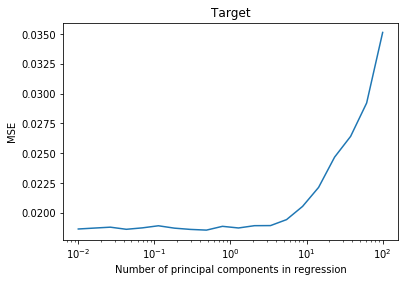

In [12]:
# 10-fold CV, with shuffle
cv_10 = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)

mse = []

alphalist = np.logspace(-2, 2, 20, endpoint=True)
# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for alpha in alphalist:
    model = xgb.sklearn.XGBRegressor(reg_alpha = alpha)
    score = -1*model_selection.cross_val_score(model, X_train, y_train.ravel(), cv=cv_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.semilogx(alphalist,mse)
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Target')

In [14]:
for index,element in enumerate(mse):
    if element == min(mse):
        best_index = index

best_alpha = alphalist[best_index]
print(best_alpha)

0.4832930238571752
